In [1]:
%reset
import csv
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.ndimage import median_filter
import numpy as np
import pandas as pd
from scipy import signal
import statistics as stats
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from scipy import stats

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
def weighted_average(distribution, weights):
    return round(sum([distribution[i]*weights[i] for i in range(len(distribution))])/sum(weights),2)

def import_csv(csvfilename):
    data = []
    with open(csvfilename, "r", encoding="utf-8", errors="ignore") as scraped:
        reader = csv.reader(scraped, delimiter=' ', skipinitialspace='True')
        next(reader)
        row_index = 0
        for row in reader:
            if row:  # avoid blank lines
                #row_index += 1
                #columns = [str(row_index), row[0], row[1], row[2], row[3]]
                columns = [row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7]]
                data.append(columns)

    return data

In [3]:
tcp_ccas = ([ 'TcpNewReno', 'TcpCubic', 'TcpVegas', 'TcpBbrV2', 'TcpModNewReno'])

In [4]:
data_in = {}

for algorithm in tcp_ccas:
    data_in[algorithm]={'time': list(), 'avETH': list(), 'avTH': list(), 'PLR': list(), 'insTH': list()}
    
    files = []
    files.append("ModNewReno-BW-effect/5-flows/10Mbps-100ms/" 
              + "1730p-btlqueue/" + algorithm + "-5-flows-10Mbps-100ms-"
              + "1730p-btlqueue-PerfData.dat")
    print(algorithm)
        
    for file_name in files:
        raw_data = import_csv(file_name);
        for row in raw_data:
            data_in[algorithm]['time'].append(pd.DataFrame({row[0]}).astype(float))
            data_in[algorithm]['insTH'].append(pd.DataFrame({row[7]}).astype(float))
            data_in[algorithm]['PLR'].append(pd.DataFrame({row[3]}).astype(float))

TcpNewReno
TcpCubic
TcpVegas
TcpBbrV2
TcpModNewReno


In [5]:
#print(data_in[tcp_ccas[0]]['time'])

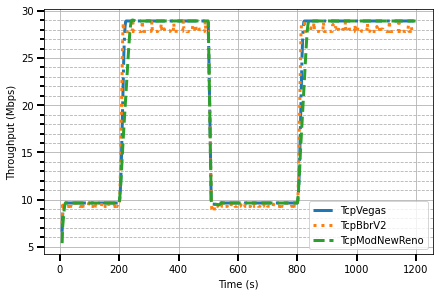

In [6]:
fig, ax1 = plt.subplots(constrained_layout=True)
ax1.plot(
        data_in[tcp_ccas[2]]['time'], pd.DataFrame(data_in[tcp_ccas[2]]['insTH']).
                                            rolling(window=5, win_type=None).mean(), '-.',
        data_in[tcp_ccas[3]]['time'], pd.DataFrame(data_in[tcp_ccas[3]]['insTH']).
                                            rolling(window=5, win_type=None).mean(), ':',
        data_in[tcp_ccas[4]]['time'], pd.DataFrame(data_in[tcp_ccas[4]]['insTH']).
                                            rolling(window=5, win_type=None).mean(), '--', linewidth=3
        )

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Throughput (Mbps)')
#plt.xscale('log')
#x = [0.0058, 0.05, 0.1, 0.2, 0.5, 1, 2, 4, 6, 10]
#values = ['0.0', '0.05', '0.1', '0.2', '0.5', '1', '2', '4', '6', '10']
#plt.xticks(x,values)
#plt.yscale('log')
#plt.ylim(0,30)
#plt.xlim(0.0001,10)
plt.grid(True)
plt.legend([tcp_ccas[2], tcp_ccas[3], tcp_ccas[4]], loc='best')
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('insTH_time_series.png', transparent=True)

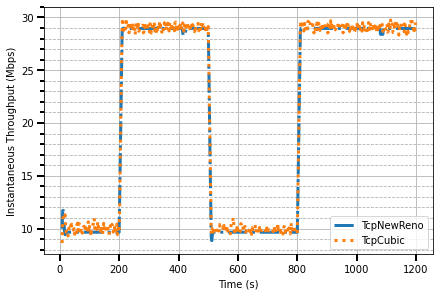

In [7]:
fig, ax1 = plt.subplots(constrained_layout=True)
ax1.plot(
        data_in[tcp_ccas[0]]['time'], pd.DataFrame(data_in[tcp_ccas[0]]['insTH']).
                                            rolling(window=5, win_type=None).mean(), '-.',
        data_in[tcp_ccas[1]]['time'], pd.DataFrame(data_in[tcp_ccas[1]]['insTH']).
                                            rolling(window=5, win_type=None).mean(), ':', linewidth=3
        )

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Instantaneous Throughput (Mbps)')
#plt.xscale('log')
#x = [0.0058, 0.05, 0.1, 0.2, 0.5, 1, 2, 4, 6, 10]
#values = ['0.0', '0.05', '0.1', '0.2', '0.5', '1', '2', '4', '6', '10']
#plt.xticks(x,values)
#plt.yscale('log')
#plt.ylim(9,10)
#plt.xlim(0.0001,10)
plt.grid(True)
plt.legend([tcp_ccas[0], tcp_ccas[1], tcp_ccas[2], tcp_ccas[3], tcp_ccas[4]], loc='lower right')
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('insTH_time_series2.png', transparent=True)

<function matplotlib.pyplot.show(close=None, block=None)>

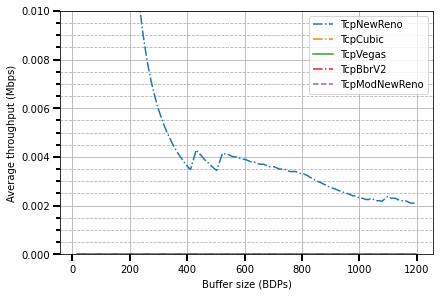

In [8]:
fig, ax1 = plt.subplots(constrained_layout=True)

ax1.plot(
        data_in[tcp_ccas[0]]['time'], pd.DataFrame(data_in[tcp_ccas[0]]['PLR']).
                                            rolling(window=10, win_type=None).mean(), '-.',
        data_in[tcp_ccas[1]]['time'], pd.DataFrame(data_in[tcp_ccas[1]]['PLR']).
                                            rolling(window=10, win_type=None).mean(), '-.',
        data_in[tcp_ccas[2]]['time'], pd.DataFrame(data_in[tcp_ccas[2]]['PLR']).
                                            rolling(window=10, win_type=None).mean(), '-',
        data_in[tcp_ccas[3]]['time'], pd.DataFrame(data_in[tcp_ccas[3]]['PLR']).
                                            rolling(window=10, win_type=None).mean(), '-.',
        data_in[tcp_ccas[4]]['time'], pd.DataFrame(data_in[tcp_ccas[4]]['PLR']).
                                            rolling(window=10, win_type=None).mean(), '--'
        )

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Buffer size (BDPs)')
plt.ylabel(r'Average throughput (Mbps)')
#plt.xscale('log')
#x = [0.0058, 0.05, 0.1, 0.2, 0.5, 1, 2, 4, 6, 10]
#values = ['0.0', '0.05', '0.1', '0.2', '0.5', '1', '2', '4', '6', '10']
#plt.xticks(x,values)
#plt.yscale('log')
plt.ylim(0,0.01)
#plt.xlim(0.0001,10)
plt.grid(True)
plt.legend([tcp_ccas[0], tcp_ccas[1], tcp_ccas[2], tcp_ccas[3], tcp_ccas[4]], loc='best')
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
#plt.savefig('PLR_vs_buffer.png', transparent=True)